In [1]:
import numpy as np
from sklearn import svm
from scipy.linalg import khatri_rao
import time as tm
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.linear_model import LogisticRegression

In [11]:
from train import my_fit, my_map

In [ ]:
def performance(model='LR', penalty='l2', C=6.0, tol=0.0001):
  Z_trn = np.loadtxt( "train.dat" )
  Z_tst = np.loadtxt( "test.dat" )

  
  n_trials = 2 # run multiple times to reduce system randomness

  d_size = 0
  t_train = 0
  t_map = 0
  acc = 0

  for t in range( n_trials ):
    # train the model
    tic = tm.perf_counter() 
    w, b = my_fit( Z_trn[:, :-1], Z_trn[:,-1], model=model, penalty=penalty, C=C, tol=tol)
    toc = tm.perf_counter()
    t_train += toc - tic

    # model features
    d_size += w.shape[0]

    # map the test data
    tic = tm.perf_counter()
    feat = my_map( Z_tst[:, :-1] )
    toc = tm.perf_counter()
    t_map += toc - tic

    # get model accuracy
    scores = feat.dot( w ) + b
    pred = np.zeros_like( scores )
    pred[scores > 0] = 1
    acc += np.average( Z_tst[ :, -1 ] == pred )

  d_size /= n_trials
  t_train /= n_trials
  t_map /= n_trials
  acc /= n_trials
  
  return d_size, t_train, t_map, acc*100

In [13]:
dimension, training_time, mapping_time, accuracy = performance()
print(f"Dimension Size: {dimension}")
print(f"Training Time: {training_time:.6f}")
print(f"Mapping Time: {mapping_time:.6f}")
print(f"Accuracy: {accuracy:.2f}")

Dimension Size: 528.0
Training Time: 1.023002
Mapping Time: 0.129850
Accuracy: 99.32


In [16]:
train_time = [[],[]]
accuracy = [[],[]]
C_array = np.linspace(0.1, 10, 30)

for C in C_array:
  _, t_time, __, acc = performance(model='LR', C=C)
  train_time[0].append(t_time)
  accuracy[0].append(acc)

  _, t_time, __, acc = performance(model='SVM', C=C)
  train_time[1].append(t_time)
  accuracy[1].append(acc)

accuracy=np.array(accuracy)
train_time=np.array(train_time)

C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.

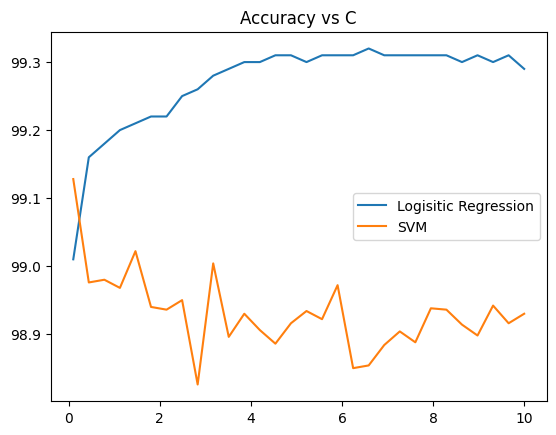

In [18]:
plt.plot(C_array, accuracy[0], label='Logisitic Regression')
plt.plot(C_array, accuracy[1], label='SVM')
plt.legend()
plt.title("Accuracy vs C")
plt.show()

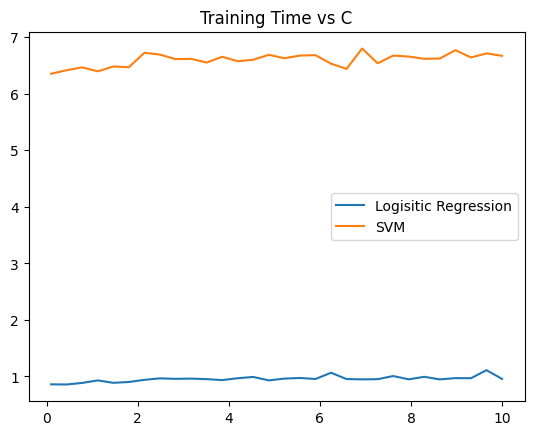

In [19]:
plt.plot(C_array, train_time[0], label='Logisitic Regression')
plt.plot(C_array, train_time[1], label='SVM')
plt.legend()
plt.title("Training Time vs C")
plt.show()